<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [LINR1] - Linear regression with direct resolution
<!-- DESC --> Low-level implementation, using numpy, of a direct resolution for a linear regression
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Just one, the illustration of a direct resolution :-)

## What we're going to do :

Equation : $ Y = X.\theta + N$  
Where N is a noise vector
and $\theta = (a,b)$ a vector as y = a.x + b

## Step 1 - Import and init

In [3]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('LINR1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.10
Notebook id          : LINR1
Run time             : Thursday 04 February 2021, 09:23:11
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning
Run dir              : ./run
Update keras cache   : False


## Step 2 - Retrieve a set of points

In [19]:
# ---- Paramètres
nb    = 100     # Nombre de points
xmin  = 0       # Distribution / x
xmax  = 10
a     = 4       # Distribution / y
b     = 2       # y= a.x + b (+ bruit)
noise = 7       # bruit

theta = np.array([[a],[b]])

# ---- Vecteur X  (1,x) x nb
#      la premiere colonne est a 1 afin que X.theta <=> 1.b + x.a

Xc1 = np.ones((nb,1))
Xc2 = np.random.uniform(xmin,xmax,nb)
X = np.c_[ Xc1, Xc2 ]

# ---- Noise
# N = np.random.uniform(-noise,noise,(nb,1))
N = noise * np.random.normal(0,1,(nb,1))

# ---- Vecteur Y
Y = (X @ theta) + N

print(Y)

# print("X:\n",X,"\nY:\n ",Y)

[[24.18422014]
 [38.2262859 ]
 [15.78885886]
 [ 3.15335386]
 [30.15266221]
 [14.60778068]
 [21.96558035]
 [23.32703909]
 [ 8.85226128]
 [ 9.3047307 ]
 [18.3494283 ]
 [25.70933967]
 [12.04121698]
 [28.45021601]
 [ 6.08452528]
 [13.54299579]
 [17.36145052]
 [ 7.6887335 ]
 [37.47370921]
 [ 6.97529345]
 [ 4.34787169]
 [15.41968652]
 [ 4.76896898]
 [-1.90814797]
 [21.11373323]
 [ 2.32799676]
 [ 7.70028364]
 [19.45565474]
 [15.7112246 ]
 [ 7.81918888]
 [15.5152622 ]
 [12.51496369]
 [13.00161738]
 [-3.00402532]
 [25.84680937]
 [23.9798751 ]
 [20.23182728]
 [15.44831919]
 [18.6397186 ]
 [20.61719381]
 [13.90471845]
 [30.15968849]
 [13.58861755]
 [21.32822393]
 [18.76473624]
 [15.34679712]
 [10.02438974]
 [19.01837719]
 [26.10771835]
 [ 7.07018132]
 [ 9.70163023]
 [ 3.49408702]
 [21.60527393]
 [ 7.04697558]
 [18.38513285]
 [30.43813055]
 [14.19786651]
 [31.37672654]
 [ 9.55604414]
 [-1.91911702]
 [17.08439322]
 [10.89563998]
 [-1.16082847]
 [16.37065184]
 [12.91402897]
 [19.11271912]
 [13.89186

### Show it

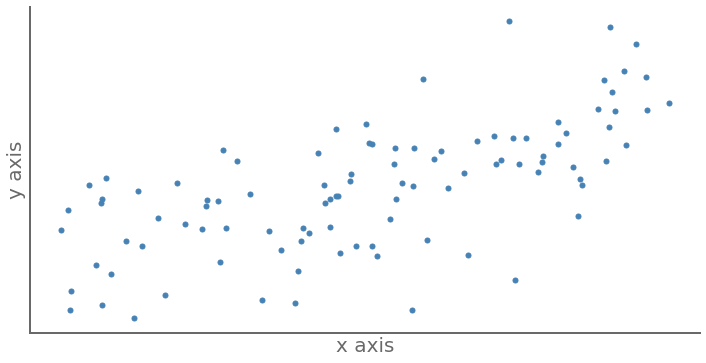

In [20]:
width = 12
height = 6

fig, ax = plt.subplots()
fig.set_size_inches(width,height)
ax.plot(X[:,1], Y, ".")
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
pwk.save_fig('01-set_of_points')
plt.show()

## Step 3 - Direct calculation of the normal equation


We'll try to find an optimal value of $\theta$, minimizing a cost function.  
The cost function, classically used in the case of linear regressions, is the **root mean square error** (racine carré de l'erreur quadratique moyenne):  

$RMSE(X,h_\theta)=\sqrt{\frac1n\sum_{i=1}^n\left[h_\theta(X^{(i)})-Y^{(i)}\right]^2}$  

With the simplified variant : $MSE(X,h_\theta)=\frac1n\sum_{i=1}^n\left[h_\theta(X^{(i)})-Y^{(i)}\right]^2$

The optimal value of regression is : $ \hat{ \theta } =( X^{-T} .X)^{-1}.X^{-T}.Y$

Démontstration : https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

In [17]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Theta :\n",theta,"\n\ntheta hat :\n",theta_hat)


Theta :
 [[4]
 [2]] 

theta hat :
 [[4.]
 [2.]]


### Show it

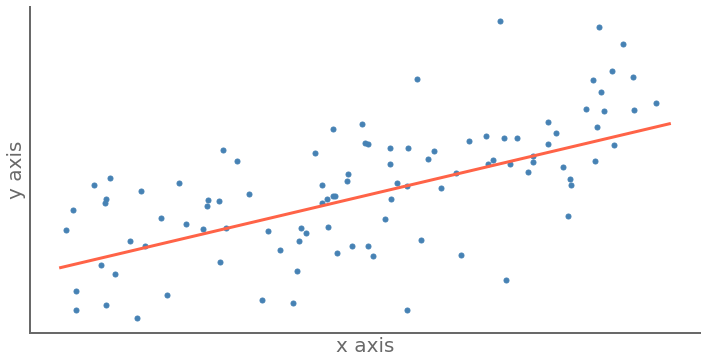

In [21]:
Xd = np.array([[1,xmin], [1,xmax]])
Yd = Xd @ theta_hat

fig, ax = plt.subplots()
fig.set_size_inches(width,height)
ax.plot(X[:,1], Y, ".")
ax.plot(Xd[:,1], Yd, "-")
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
pwk.save_fig('02-regression-line')
plt.show()

In [ ]:
pwk.end()

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>